### Data Pull from Reddit

In [ ]:
#import packages

from psaw import PushshiftAPI
import datetime as dt
import pandas as pd

api = PushshiftAPI()

In [204]:
import praw
import pandas as pd
from datetime import datetime, timedelta

reddit = praw.Reddit(
    client_id="6ddm7lHf0PqfNYpCM20gyQ",
    client_secret="u8cPvR-d_NzChGy1Ukn10IKz-EN3yQ",
    user_agent="my user agent",
)

In [237]:
int(datetime.timestamp(datetime.now() - timedelta(weeks=1)))


1686327317

In [232]:
int(datetime.timestamp(datetime(2022, 5, 1)))

1651334400

In [243]:
subreddit = reddit.subreddit("terraluna")  # Replace "python" with your desired subreddit

In [265]:
testlist = []

for submission in subreddit.top(time_filter="all", limit=None):
    testlist.append(submission.created_utc)
    

In [266]:
len(testlist)

993

In [267]:
print(datetime.utcfromtimestamp(min(testlist)).strftime('%Y-%m-%d %H:%M:%S'))

2021-07-07 02:58:44


In [247]:
# Create empty lists or dictionaries to store the data
submissions_data = []
comments_data = []

subreddit = reddit.subreddit("terraluna")  # Replace "python" with your desired subreddit

# Define the time range
start_time = int(datetime.timestamp(datetime(2022, 5, 1)))  # Start time is 1 May
end_time = int(datetime.timestamp(datetime(2022, 5, 31)))  # End time is 31 May

# Retrieve submission data within the time range
for submission in subreddit.search("terra"):  # Retrieve all submissions
    if submission.created_utc < start_time or submission.created_utc > end_time:
        break  # Stop if submission is older than the time range
    submission_data = {
        "Title": submission.title,
        "Score": submission.score,
        "Author": submission.author,
        "ID": submission.id
        # Add more attributes as needed
    }
    submissions_data.append(submission_data)

    # Retrieve comment data within the time range
    submission.comments.replace_more(limit=None)  # Retrieve all comments, including nested ones
    for comment in submission.comments.list():
        if comment.created_utc < start_time:
            break  # Stop if comment is older than the time range
        comment_data = {
            "Submission ID": submission.id,
            "Parent ID": comment.parent_id,
            "Comment ID": comment.id,
            "Comment": comment.body,
            "Author": comment.author,
            # Add more attributes as needed
        }
        comments_data.append(comment_data)

submissions_df = pd.DataFrame(submissions_data)
comments_df = pd.DataFrame(comments_data)


In [248]:
submissions_df.head()

""


In [226]:
comments_df.head()

,Submission ID,Comment,Author
0,14aus1j,If it does then people who are buying now or when price was lower are going to make some serious bank,dmack080288
1,14aus1j,"If the re-peg is incremental and the mint to burn function is turned back on, it’s possible. I still believe. There’s enough proposals for re-pegs floating about at the minute, the community just needs to agree on the most realistic one and get a team working on the algorithm, just have to wait and see.",McRippington
2,14aus1j,If the whales wait for small fishes to profit yes .,Any-Big-1677
3,14aus1j,"Id love it, I support it, but I’ll believe it when I see it",koltonstanley
4,14aus1j,"not very realistic, calculating what the impact will be on the full market cap.. \nbut i hope i am wrong",AgreeableSkirt1440


In [128]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

#define date delta (days=1 is everyday, days=2 skips one day)

delta_01 = dt.timedelta(days=1)

#define start date and end date

start_date_01 = dt.date(2022, 4, 30)
end_date_01 = dt.date(2022, 5, 31)

end_date_02 = dt.date(2022, 5, 31)

#define keywords

keywords_01 = ["TerraLuna", "Terra", "Luna", "UST", "LUNA", "Do Kwon", "Kwon", "TerraUSD", "Anchor"]

#define subreddit
subreddit_01="terraluna"
subreddit_02=["cryptocurrency", "bitcoin", 'cryptomarkets', 'defi', 'ethereum', 'cardano', 'kucoin', 'binance', 'okx']

#get submissions, TerraLuna Subreddit
while start_date_01 <= end_date_01:
    #print start date
    print(start_date_01)
    #print start epoch
    start_epoch=int(dt.datetime(start_date_01.year, start_date_01.month, start_date_01.day).timestamp())
    print(start_epoch)
    end_epoch_temp = start_date_01 + delta_01
    end_epoch=int(dt.datetime(end_epoch_temp.year, end_epoch_temp.month, end_epoch_temp.day).timestamp())
    print(end_epoch)
    start_date_01 += delta_01
    gen = api.search_submissions(after=start_epoch, before=end_epoch, subreddit=subreddit_01)
    df = pd.DataFrame([obj.d_ for obj in gen])
    df.to_csv(start_date_01.strftime('%m_%d_%Y')+"-"+".csv")

#get submissions, other crypto subreddits, TerraLuna specific keywords
while start_date_01 <= end_date_02:
    #print start date
    print(start_date_01)
    #print start epoch
    start_epoch=int(dt.datetime(start_date_01.year, start_date_01.month, start_date_01.day).timestamp())
    print(start_epoch)
    end_epoch_temp = start_date_01 + delta_01
    end_epoch=int(dt.datetime(end_epoch_temp.year, end_epoch_temp.month, end_epoch_temp.day).timestamp())
    print(end_epoch)
    start_date_01 += delta_01
    for key in keywords_01:
        gen = api.search_submissions(after=start_epoch, before=end_epoch, subreddit=subreddit_02, q=key)
        df = pd.DataFrame([obj.d_ for obj in gen])
        df.to_csv(start_date_01.strftime('%m_%d_%Y')+"-"+str(key)+".csv")

### Compile Data

In [129]:
import os
directory = 'TerraLuna'

In [130]:
def process_data(path):
    df=pd.read_csv(path)
    if not(df.empty):
        df['date']=pd.to_datetime(df['created_utc'],unit='s').dt.date
        df = df[['subreddit', 'selftext', 'title', 'date']]
    return df

In [131]:
df_terraluna=pd.DataFrame()

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and f.endswith(".csv"):
        df_terraluna=pd.concat([df_terraluna, process_data(f)])

In [132]:
df_terraluna.shape

(20044, 5)

In [133]:
df_terraluna.head()

,subreddit,selftext,title,date,Unnamed: 0
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,NaN
0,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,NaN
1,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,NaN
2,CryptoCurrency,"Here's a post of someone explaining how UST could be depegged for good: [risks\_how\_real\_are\_they](https://www.reddit.com/r/terraluna/comments/s2bnbw/terra_luna_ust_ecosystem_risks_how_real_are_they/)\n\nOne of the top comments was \n\n&gt; Rumor going around that Do just bought more than $1 billion in Btc to help maintain peg in times of crisis. Appreciate your analysis but he’s playing 5D chess while we all play checkers \n\nOr how about this? Bet you've seen responses like this a lot in certain subs:\n\n&gt; So question is what's your buy price you put in already for LUNA? lol. Since you state you've been looking, I'm going to assume you have 0 LUNA. \n\nI'm spending a lot of time in old reddit posts, reading how people reacted to events like ""FUD"", bullruns or crashes - and you should do that, too. It's easier to learn from other investor's failures than learning it by losing money yourself.\n\nAnother good advice is the ""advanced search"" on Twitter. Just check the guy you want to follow by searching something and then chosing ""Advanced search"" from the menu. You can insert a twitter account and also dates (like the weeks before the 2021 crash).",They've been warned - but they didn't listen.,2022-05-13,NaN
3,CryptoCurrency,"I'm so depressed that I can't even tell you how I am, there is no way to describe so much sadness, my whole life and my funds of 20 thousand dollars went overboard, I can't even go to a psychologist, I think that in a few days I will finish everything This without further delay, I know I shouldn't do this and I know that even if I want to many of you won't mind, but if you want to help me with something I will do it I'll leave you my BTC address: 15YSSwSibEBGGEkgQ3JSvhnXks1G9Gwz95 I would like to go to a psychologist at least I would like to have an ice cream sitting in the park while I reflect on my life I just want to find another reason to live. 😔 \nThe worst of all is that I live in Argentina, a place where it takes years to have that kind of money. I feel so bad.",terraluna ended my life,2022-05-13,NaN


In [134]:
# Reset index and drop duplicates
df_terraluna=df_terraluna.reset_index()
df_terraluna=df_terraluna.drop(['index', 'Unnamed: 0'], axis=1)
df_terraluna=df_terraluna.drop_duplicates(ignore_index=True)
df_terraluna.head()

,subreddit,selftext,title,date
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14
3,CryptoCurrency,"Here's a post of someone explaining how UST could be depegged for good: [risks\_how\_real\_are\_they](https://www.reddit.com/r/terraluna/comments/s2bnbw/terra_luna_ust_ecosystem_risks_how_real_are_they/)\n\nOne of the top comments was \n\n&gt; Rumor going around that Do just bought more than $1 billion in Btc to help maintain peg in times of crisis. Appreciate your analysis but he’s playing 5D chess while we all play checkers \n\nOr how about this? Bet you've seen responses like this a lot in certain subs:\n\n&gt; So question is what's your buy price you put in already for LUNA? lol. Since you state you've been looking, I'm going to assume you have 0 LUNA. \n\nI'm spending a lot of time in old reddit posts, reading how people reacted to events like ""FUD"", bullruns or crashes - and you should do that, too. It's easier to learn from other investor's failures than learning it by losing money yourself.\n\nAnother good advice is the ""advanced search"" on Twitter. Just check the guy you want to follow by searching something and then chosing ""Advanced search"" from the menu. You can insert a twitter account and also dates (like the weeks before the 2021 crash).",They've been warned - but they didn't listen.,2022-05-13
4,CryptoCurrency,"I'm so depressed that I can't even tell you how I am, there is no way to describe so much sadness, my whole life and my funds of 20 thousand dollars went overboard, I can't even go to a psychologist, I think that in a few days I will finish everything This without further delay, I know I shouldn't do this and I know that even if I want to many of you won't mind, but if you want to help me with something I will do it I'll leave you my BTC address: 15YSSwSibEBGGEkgQ3JSvhnXks1G9Gwz95 I would like to go to a psychologist at least I would like to have an ice cream sitting in the park while I reflect on my life I just want to find another reason to live. 😔 \nThe worst of all is that I live in Argentina, a place where it takes years to have that kind of money. I feel so bad.",terraluna ended my life,2022-05-13


In [135]:
df_terraluna.selftext.astype(str) + ' ' + df_terraluna.title.astype(str)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [136]:
# Join title and content text as one column
df_terraluna['all_text'] = df_terraluna.selftext.astype(str) + ' ' + df_terraluna.title.astype(str)
df_terraluna.head()

,subreddit,selftext,title,date,all_text
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan Trader doubles down on $10 million bet against Do Kwon through LUNA short position
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] Where can you buy TerraLuna now?
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks! Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?"
3,CryptoCurrency,"Here's a post of someone explaining how UST could be depegged for good: [risks\_how\_real\_are\_they](https://www.reddit.com/r/terraluna/comments/s2bnbw/terra_luna_ust_ecosystem_risks_how_real_are_they/)\n\nOne of the top comments was \n\n&gt; Rumor going around that Do just bought more than $1 billion in Btc to help maintain peg in times of crisis. Appreciate your analysis but he’s playing 5D chess while we all play checkers \n\nOr how about this? Bet you've seen responses like this a lot in certain subs:\n\n&gt; So question is what's your buy price you put in already for LUNA? lol. Since you state you've been looking, I'm going to assume you have 0 LUNA. \n\nI'm spending a lot of time in old reddit posts, reading how people reacted to events like ""FUD"", bullruns or crashes - and you should do that, too. It's easier to learn from other investor's failures than learning it by losing money yourself.\n\nAnother good advice is the ""advanced search"" on Twitter. Just check the guy you want to follow by searching something and then chosing ""Advanced search"" from the menu. You can insert a twitter account and also dates (like the weeks before the 2021 crash).",They've been warned - but they didn't listen.,2022-05-13,"Here's a post of someone explaining how UST could be depegged for good: [risks\_how\_real\_are\_they](https://www.reddit.com/r/terraluna/comments/s2bnbw/terra_luna_ust_ecosystem_risks_how_real_are_they/)\n\nOne of the top comments was \n\n&gt; Rumor going around that Do just bought more than $1 billion in Btc to help maintain peg in times of crisis. Appreciate your analysis but he’s playing 5D chess while we all play checkers \n\nOr how about this? Bet you've seen responses like this a lot in certain subs:\n\n&gt; So question is what's your buy price you put in already for LUNA? lol. Since you state you've been looking, I'm going to assume you have 0 LUNA. \n\nI'm spending a lot of time in old reddit posts, reading how people reacted to events like ""FUD"", bullruns or crashes - and you should do that, too. It's easier to learn from other investor's failures than learni

In [137]:
df_terraluna.shape

(11155, 5)

### EDA (Pivot Etc)

In [138]:
# Make text lower
df_terraluna['all_text'] = df_terraluna['all_text'].astype(str).str.lower()
df_terraluna.head(3)

,subreddit,selftext,title,date,all_text
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan trader doubles down on $10 million bet against do kwon through luna short position
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"i know people are mostly burnt out on the terraluna story by now. but this is something that doesn't quite make sense on it's face. fro someone who knows the basics on the two protocols, this seems like a weird mystery. hopefully, with your eli5, it will help others understand the crypto market in general more deeply, even though ust isn't really relevant anymore.\n\nsorry for the dummy question. just can't find answers anywhere on google or in the other forums. i appreciate you taking the time to educate an idiot like myself. thanks! can someone eli5: why does terra ust have any value at all anymore? i'm shocked to see it in the top 50 on coinmarketcap. isn't the value derived from the arbitrage using luna, which is now dead?"


In [139]:
# count how many submissions per day
pd.pivot_table(df_terraluna, index='date', values='all_text', columns='subreddit', aggfunc='count')

subreddit,Bitcoin,CryptoCurrency,terraluna
date,,,
2022-04-29,NaN,5.0,5.0
2022-04-30,NaN,5.0,14.0
2022-05-01,NaN,8.0,20.0
2022-05-02,NaN,11.0,35.0
2022-05-03,NaN,6.0,31.0
2022-05-04,NaN,3.0,22.0
2022-05-05,6.0,12.0,18.0
2022-05-06,2.0,13.0,24.0
2022-05-07,2.0,7.0,28.0


#### NLTK Text Analysis

In [140]:
# NLTK Package and Regex Tokenizer

import nltk
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

In [141]:
# Tokenize all_text

df_terraluna['text_token']=df_terraluna['all_text'].apply(regexp.tokenize)
df_terraluna.head()

# Get English Stopwords
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with custom stopwords
my_stopwords = ['https', 'nan', 'removed']
stopwords.extend(my_stopwords)

df_terraluna['text_token'] = df_terraluna['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df_terraluna.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,subreddit,selftext,title,date,all_text,text_token
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan trader doubles down on $10 million bet against do kwon through luna short position,"[trader, doubles, 10, million, bet, kwon, luna, short, position]"
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]"
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"i know people are mostly burnt out on the terraluna story by now. but this is something that doesn't quite make sense on it's face. fro someone who knows the basics on the two protocols, this seems like a weird mystery. hopefully, with your eli5, it will help others understand the crypto market in general more deeply, even though ust isn't really relevant anymore.\n\nsorry for the dummy question. just can't find answers anywhere on google or in the other forums. i appreciate you taking the time to educate an idiot like myself. thanks! can someone eli5: why does terra ust have any value at all anymore? i'm shocked to see it in the top 50 on coinmarketcap. isn't the value derived from the arbitrage using luna, which is now dead?","[know, people, mostly, burnt, terraluna, story, something, quite, make, sense, face, fro, someone, knows, basics, two, protocols, seems, like, weird, mystery, hopefully, eli5, help, others, understand, crypto, market, general, deeply, even, though, ust, really, relevant, anymore, sorry, dummy, question, find, answers, anywhere, google, forums, appreciate, taking, time, educate, idiot, like, thanks, someone, eli5, terra, ust, value, anymore, shocked, see, top, 50, coinmarketcap, value, derived, arbitrage, using, luna, dead]"
3,CryptoCurrency,"Here's a post of someone explaining how UST could be depegged for good: [risks\_how\_real\_are\_they](https://www.reddit.com/r/terraluna/comments/s2bnbw/terra_luna_ust_ecosystem_risks_how_real_are_they/)\n\nOne of the top comments was \n\n&gt; Rumor going around that Do just bought more than $1 billion in Btc to help maintain peg in times of crisis. Appreciate your analysis but he’s playing 5D chess while we all play checkers \n\nOr how about this? Bet you've seen responses like this a lot in certain subs:\n\n&gt; So question is what's your buy price you put in already for LUNA? lol. Since you state you've been looking, I'm going to assume you have 0 LUNA. \n\nI'm spending a lot of time in old reddit posts, reading how people reacted to events like ""FUD"", bullruns or crashes - and you should do that, too. It's easier to learn from other investor's failures than learning it by losing money yourself.\n\nAnother good advice is the ""advanced search"" on Twitter. Just check the guy you want to follow by searching something and then chosing ""Advanced search"" from the menu. You can insert a twitter account and also dates (like the weeks before the 2021 crash).",They've been warned - but they didn't listen.,2022-05-13,"here's a post of someone explaining how ust could be depegged for good: [risks\_how\_real\_are\_they](https://www.reddit.com/r/terraluna/comments/s2bnbw/terra_luna_ust_ecosystem_risks_how_real_are_they/)\n\none of the top comments was \n\n&gt; rumor goin

In [142]:
# Only keep words with length more than 2

df_terraluna['text_string'] = df_terraluna['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df_terraluna.head()

,subreddit,selftext,title,date,all_text,text_token,text_string
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan trader doubles down on $10 million bet against do kwon through luna short position,"[trader, doubles, 10, million, bet, kwon, luna, short, position]",trader doubles million bet kwon luna short position
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"i know people are mostly burnt out on the terraluna story by now. but this is something that doesn't quite make sense on it's face. fro someone who knows the basics on the two protocols, this seems like a weird mystery. hopefully, with your eli5, it will help others understand the crypto market in general more deeply, even though ust isn't really relevant anymore.\n\nsorry for the dummy question. just can't find answers anywhere on google or in the other forums. i appreciate you taking the time to educate an idiot like myself. thanks! can someone eli5: why does terra ust have any value at all anymore? i'm shocked to see it in the top 50 on coinmarketcap. isn't the value derived from the arbitrage using luna, which is now dead?","[know, people, mostly, burnt, terraluna, story, something, quite, make, sense, face, fro, someone, knows, basics, two, protocols, seems, like, weird, mystery, hopefully, eli5, help, others, understand, crypto, market, general, deeply, even, though, ust, really, relevant, anymore, sorry, dummy, question, find, answers, anywhere, google, forums, appreciate, taking, time, educate, idiot, like, thanks, someone, eli5, terra, ust, value, anymore, shocked, see, top, 50, coinmarketcap, value, derived, arbitrage, using, luna, dead]",know people mostly burnt terraluna story something quite make sense face fro someone knows basics two protocols seems like weird mystery hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value derived arbitrage using luna dead
3,CryptoCurrency,"Here's a post of someone explaining how UST could be depegged for good: [risks\_how\_real\_are\_they](https://www.reddit.com/r/terraluna/comments/s2bnbw/terra_luna_ust_ecosystem_risks_how_real_are_they/)\n\nOne of the top comments was \n\n&gt; Rumor going around that Do just bought more than $1 billion in Btc to help maintain peg in times of crisis. Appreciate your analysis but he’s playing 5D chess while we all play checkers \n\nOr how about this? Bet you've seen responses like this a lot in certain subs:\n\n&gt; So question is what's your buy price you put in already for LUNA? lol. Since you state you've been looking, I'm going to assume you have 0 LUNA. \n\nI'm spending a lot of time in old reddit posts, reading how people reacted to events like ""FUD"", bullruns or crashes - and you should do that, too. It's easier to learn from other investor's failures than learning it by losing money yourself.\n\nAnother good advice is the ""advanced 

In [143]:
# Create list of all words
all_words = ' '.join([word for word in df_terraluna['text_string']])

# Tokenize all words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [144]:
# Get distribution of words

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'luna': 11471, 'terra': 4411, 'ust': 4270, 'crypto': 2475, 'amp': 2260, 'people': 1887, 'like': 1763, 'get': 1724, 'money': 1600, 'would': 1554, ...})

In [145]:
# Only get words with occurence of 5 or more

df_terraluna['text_string_fdist'] = df_terraluna['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 5 ]))
df_terraluna.head()

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan trader doubles down on $10 million bet against do kwon through luna short position,"[trader, doubles, 10, million, bet, kwon, luna, short, position]",trader doubles million bet kwon luna short position,trader million bet kwon luna short position
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna,buy terraluna
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"i know people are mostly burnt out on the terraluna story by now. but this is something that doesn't quite make sense on it's face. fro someone who knows the basics on the two protocols, this seems like a weird mystery. hopefully, with your eli5, it will help others understand the crypto market in general more deeply, even though ust isn't really relevant anymore.\n\nsorry for the dummy question. just can't find answers anywhere on google or in the other forums. i appreciate you taking the time to educate an idiot like myself. thanks! can someone eli5: why does terra ust have any value at all anymore? i'm shocked to see it in the top 50 on coinmarketcap. isn't the value derived from the arbitrage using luna, which is now dead?","[know, people, mostly, burnt, terraluna, story, something, quite, make, sense, face, fro, someone, knows, basics, two, protocols, seems, like, weird, mystery, hopefully, eli5, help, others, understand, crypto, market, general, deeply, even, though, ust, really, relevant, anymore, sorry, dummy, question, find, answers, anywhere, google, forums, appreciate, taking, time, educate, idiot, like, thanks, someone, eli5, terra, ust, value, anymore, shocked, see, top, 50, coinmarketcap, value, derived, arbitrage, using, luna, dead]",know people mostly burnt terraluna story something quite make sense face fro someone knows basics two protocols seems like weird mystery hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value derived arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems like weird hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value arbitrage using luna dead
3,CryptoCurrency,"Here's a post of someone explaining how UST could be depegged for good: [risks\_how\_real\_are\_they](https://www.reddit.com/r/terraluna/comments/s2bnbw/terra_luna_ust_ecosystem_risks_how_real_are_they/)\n\nOne of the top comments was \n\n&gt; Rumor going around that Do just bought more than $1 billion in Btc to help maintain peg in times of crisis. Appreciate your analysis but he’s playing 5D chess while we all play checkers \n\nOr how a

In [146]:
# Download for Lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [147]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

# get lemmatized words
df_terraluna['text_string_lem'] = df_terraluna['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
df_terraluna['is_equal']=(df_terraluna['text_string_fdist']==df_terraluna['text_string_lem'])

In [148]:
# show level count
df_terraluna.is_equal.value_counts()

True     11150
False        5
Name: is_equal, dtype: int64

In [149]:
all_words_lem = ' '.join([word for word in df_terraluna['text_string_lem']])

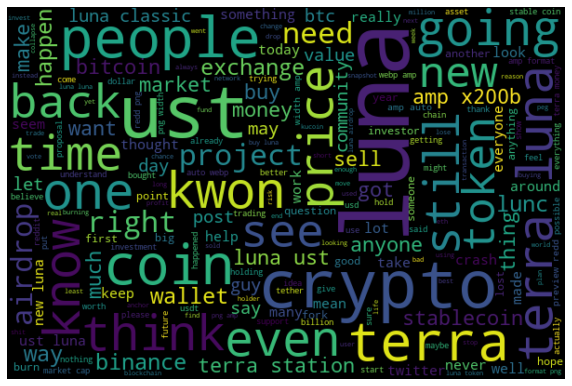

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [151]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [152]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [153]:
fd.most_common(1000)

[('luna', 11471),
 ('terra', 4411),
 ('ust', 4270),
 ('crypto', 2475),
 ('amp', 2260),
 ('people', 1887),
 ('like', 1763),
 ('get', 1724),
 ('money', 1600),
 ('would', 1554),
 ('new', 1546),
 ('com', 1517),
 ('market', 1355),
 ('price', 1323),
 ('wallet', 1285),
 ('buy', 1238),
 ('know', 1235),
 ('kwon', 1175),
 ('back', 1115),
 ('time', 1096),
 ('coin', 1090),
 ('one', 1062),
 ('going', 1048),
 ('still', 1026),
 ('burn', 1012),
 ('airdrop', 1004),
 ('even', 998),
 ('think', 993),
 ('binance', 956),
 ('see', 924),
 ('could', 873),
 ('coins', 860),
 ('btc', 859),
 ('anyone', 824),
 ('classic', 782),
 ('crash', 781),
 ('make', 768),
 ('much', 762),
 ('station', 761),
 ('lost', 754),
 ('also', 743),
 ('sell', 721),
 ('lunc', 705),
 ('bitcoin', 693),
 ('want', 691),
 ('right', 689),
 ('help', 681),
 ('need', 678),
 ('may', 668),
 ('way', 648),
 ('bought', 647),
 ('many', 622),
 ('got', 618),
 ('token', 610),
 ('community', 601),
 ('x200b', 600),
 ('please', 598),
 ('good', 597),
 ('post', 

In [154]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

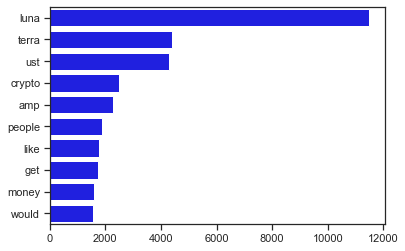

In [155]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

### Sentiment Analysis

In [156]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [157]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [158]:
# Using Polarity
df_terraluna['polarity'] = df_terraluna['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df_terraluna.tail(3)

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
11152,CryptoCurrency,"\n\nTitle. If I wrote here one month ago that 1DOGE is more valuable than Terra, then 99% of you will laugh at me. \n\nLikewise, if this happened to Dogecoin, I also think that many of you would not have such sympathy for the loss of money of the people who invested and lost everything. I can totally imagine comments like: Nothing else to expect, pump &amp; dump, shitcoin, elon manipulates etc ... Don't think I'm some crypto-meme boy. I can judge which project has the technology and perspective for the future and which is shitcoin. But again, DOGECOIN has proven to be the currency of the people, and although it has essentially no use, it is an ideal cryptocurrency, for example, for low-fee payments. So yes, I'm a fan but of course I'm mainly going BTC &amp; ETH. And now the main task and I will return to the beginning of this post. \n\nTerra - Technology, serious company, future, popularity with crypto investors, interesting price increase for the last year and ... during last 3 days death.\n\nDogecoin - Basically nothing, elon musk, unpopular with most underground crypto investors and ... in biggest 2022 crash still at rank 10.\n\nIt is funny or sad? What do you think? \n\n(Also sorry for my english, it is not my primary language )","If I wrote here one month ago that 1DOGE is more valuable than Terra, then 99% of you will laugh at me.",2022-05-25,"\n\ntitle. if i wrote here one month ago that 1doge is more valuable than terra, then 99% of you will laugh at me. \n\nlikewise, if this happened to dogecoin, i also think that many of you would not have such sympathy for the loss of money of the people who invested and lost everything. i can totally imagine comments like: nothing else to expect, pump &amp; dump, shitcoin, elon manipulates etc ... don't think i'm some crypto-meme boy. i can judge which project has the technology and perspective for the future and which is shitcoin. but again, dogecoin has proven to be the currency of the people, and although it has essentially no use, it is an ideal cryptocurrency, for example, for low-fee payments. so yes, i'm a fan but of course i'm mainly going btc &amp; eth. and now the main task and i will return to the beginning of this post. \n\nterra - technology, serious company, future, popularity with crypto investors, interesting price increase for the last year and ... during last 3 days death.\n\ndogecoin - basically nothing, elon musk, unpopular with most underground crypto investors and ... in biggest 2022 crash still at rank 10.\n\nit is funny or sad? what do you think? \n\n(also sorry for my english, it is not my primary language ) if i wrote here one month ago that 1doge is more valuable than terra, then 99% of you will laugh at me.","[title, wrote, one, month, ago, 1doge, valuable, terra, 99, laugh, likewise, happened, dogecoin, also, think, many, would, sympathy, loss, money, people, invested, lost, everything, totally, imagine, comments, like, nothing, else, expect, pump, amp, dump, shitcoin, elon, manipulates, etc, think, crypto, meme, boy, judge, project, technology, perspective, future, shitcoin, dogecoin, proven, currency, people, although, essentially, use, ideal, cryptocurrency, example, low, fee, payments, yes, fan, course, mainly, going, btc, amp, eth, main, task, return, beginning, post, terra, technology, serious, company, future, popularity, crypto, investors, interesting, price, increase, last, year, last, 3, days, death, dogecoin, basically, nothing, elon, musk, unpopular, underground, crypto, investors, ...]",title wrote one month ago 1doge valuable terra laugh likewise happened dogecoin also think many would sympathy loss money people invested lost everything totally imagine comments like nothing else expect pump amp dump shitcoin elon manipulates etc think crypto meme boy judge project technology perspective future shitcoin do

In [159]:
# Change data structure
df_terraluna = pd.concat(
    [df_terraluna, 
     df_terraluna['polarity'].apply(pd.Series)], axis=1)
df_terraluna.head(3)

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan trader doubles down on $10 million bet against do kwon through luna short position,"[trader, doubles, 10, million, bet, kwon, luna, short, position]",trader doubles million bet kwon luna short position,trader million bet kwon luna short position,trader million bet kwon luna short position,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna,buy terraluna,buy terraluna,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"i know people are mostly burnt out on the terraluna story by now. but this is something that doesn't quite make sense on it's face. fro someone who knows the basics on the two protocols, this seems like a weird mystery. hopefully, with your eli5, it will help others understand the crypto market in general more deeply, even though ust isn't really relevant anymore.\n\nsorry for the dummy question. just can't find answers anywhere on google or in the other forums. i appreciate you taking the time to educate an idiot like myself. thanks! can someone eli5: why does terra ust have any value at all anymore? i'm shocked to see it in the top 50 on coinmarketcap. isn't the value derived from the arbitrage using luna, which is now dead?","[know, people, mostly, burnt, terraluna, story, something, quite, make, sense, face, fro, someone, knows, basics, two, protocols, seems, like, weird, mystery, hopefully, eli5, help, others, understand, crypto, market, general, deeply, even, though, ust, really, relevant, anymore, sorry, dummy, question, find, answers, anywhere, google, forums, appreciate, taking, time, educate, idiot, like, thanks, someone, eli5, terra, ust, value, anymore, shocked, see, top, 50, coinmarketcap, value, derived, arbitrage, using, luna, dead]",know people mostly burnt terraluna story something quite make sense face fro someone knows basics two protocols seems like weird mystery hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value derived arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems like weird hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems like weird hopefully eli5 help others understand crypto marke

In [160]:
# Create new sentiment variable
df_terraluna['sentiment'] = df_terraluna['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_terraluna.head(4)

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan trader doubles down on $10 million bet against do kwon through luna short position,"[trader, doubles, 10, million, bet, kwon, luna, short, position]",trader doubles million bet kwon luna short position,trader million bet kwon luna short position,trader million bet kwon luna short position,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000,neutral
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna,buy terraluna,buy terraluna,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000,neutral
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"i know people are mostly burnt out on the terraluna story by now. but this is something that doesn't quite make sense on it's face. fro someone who knows the basics on the two protocols, this seems like a weird mystery. hopefully, with your eli5, it will help others understand the crypto market in general more deeply, even though ust isn't really relevant anymore.\n\nsorry for the dummy question. just can't find answers anywhere on google or in the other forums. i appreciate you taking the time to educate an idiot like myself. thanks! can someone eli5: why does terra ust have any value at all anymore? i'm shocked to see it in the top 50 on coinmarketcap. isn't the value derived from the arbitrage using luna, which is now dead?","[know, people, mostly, burnt, terraluna, story, something, quite, make, sense, face, fro, someone, knows, basics, two, protocols, seems, like, weird, mystery, hopefully, eli5, help, others, understand, crypto, market, general, deeply, even, though, ust, really, relevant, anymore, sorry, dummy, question, find, answers, anywhere, google, forums, appreciate, taking, time, educate, idiot, like, thanks, someone, eli5, terra, ust, value, anymore, shocked, see, top, 50, coinmarketcap, value, derived, arbitrage, using, luna, dead]",know people mostly burnt terraluna story something quite make sense face fro someone knows basics two protocols seems like weird mystery hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value derived arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems like weird hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems like weird hopefully eli5 help othe

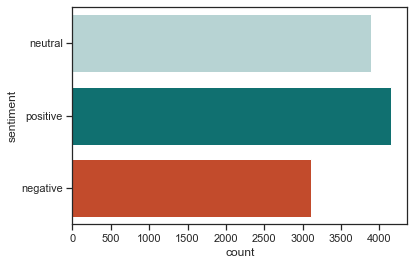

In [161]:
# Number of submissions by sentiment
sns.countplot(y='sentiment', 
             data=df_terraluna, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

### Market Data

In [162]:
df_market_data = pd.read_csv('Terra Classic Historical Data - Investing.com.csv')
df_market_data['Date'] = pd.to_datetime(df_market_data.Date, format='%b %d, %Y')
df_market_data=df_market_data.sort_values(by='Date')
df_market_data=df_market_data.reset_index(drop=True)
df_market_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-05-01,82.269051,78.099701,82.641007,76.876831,3.79M,5.33%
1,2022-05-02,84.292404,82.269051,85.049316,80.558594,3.96M,2.46%
2,2022-05-03,82.474968,84.249344,85.863052,81.235748,2.52M,-2.16%
3,2022-05-04,86.101417,82.499970,88.174202,82.071724,3.85M,4.40%
4,2022-05-05,82.353142,86.160782,87.820511,79.234360,4.63M,-4.35%
5,2022-05-06,77.375359,82.353142,82.951904,77.261986,4.76M,-6.04%
6,2022-05-07,68.084297,77.375359,77.466827,63.486755,7.12M,-12.01%
7,2022-05-08,64.296402,68.086670,68.374855,59.498692,15.28M,-5.56%
8,2022-05-09,30.188086,64.292778,65.176178,30.188086,36.97M,-53.05%
9,2022-05-10,17.275419,30.195242,39.807178,13.728713,142.58M,-42.77%


In [163]:
df_market_data2 = pd.read_csv('UST-USD.csv')
df_market_data2['ust'] = df_market_data2.Close
df_market_data2=df_market_data2.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])

In [164]:
df_market_data['ust']=df_market_data2['ust']
df_market_data

,Date,Price,Open,High,Low,Vol.,Change %,ust
0,2022-05-01,82.269051,78.099701,82.641007,76.876831,3.79M,5.33%,1.001649
1,2022-05-02,84.292404,82.269051,85.049316,80.558594,3.96M,2.46%,1.001400
2,2022-05-03,82.474968,84.249344,85.863052,81.235748,2.52M,-2.16%,1.000244
3,2022-05-04,86.101417,82.499970,88.174202,82.071724,3.85M,4.40%,0.999365
4,2022-05-05,82.353142,86.160782,87.820511,79.234360,4.63M,-4.35%,0.999546
5,2022-05-06,77.375359,82.353142,82.951904,77.261986,4.76M,-6.04%,0.999624
6,2022-05-07,68.084297,77.375359,77.466827,63.486755,7.12M,-12.01%,0.996868
7,2022-05-08,64.296402,68.086670,68.374855,59.498692,15.28M,-5.56%,0.996401
8,2022-05-09,30.188086,64.292778,65.176178,30.188086,36.97M,-53.05%,0.793393
9,2022-05-10,17.275419,30.195242,39.807178,13.728713,142.58M,-42.77%,0.799919


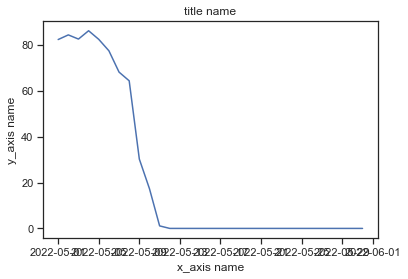

<Figure size 3600x2160 with 0 Axes>

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline

x_axis = df_market_data.Date

y_axis = df_market_data.Price

plt.plot(x_axis, y_axis)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')

plt.figure(figsize=(50,30))

plt.show()

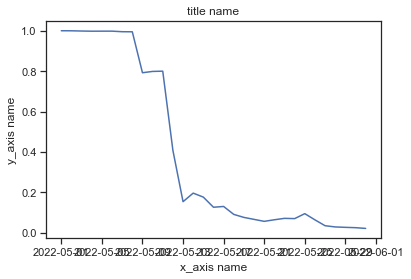

<Figure size 3600x2160 with 0 Axes>

In [166]:
x_axis = df_market_data.Date

y_axis2 = df_market_data.ust

plt.plot(x_axis, y_axis2)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')

plt.figure(figsize=(50,30))

plt.show()

### Sentiment Analysis - Dates

In [167]:
df_terraluna.head()

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan trader doubles down on $10 million bet against do kwon through luna short position,"[trader, doubles, 10, million, bet, kwon, luna, short, position]",trader doubles million bet kwon luna short position,trader million bet kwon luna short position,trader million bet kwon luna short position,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000,neutral
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna,buy terraluna,buy terraluna,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000,neutral
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"i know people are mostly burnt out on the terraluna story by now. but this is something that doesn't quite make sense on it's face. fro someone who knows the basics on the two protocols, this seems like a weird mystery. hopefully, with your eli5, it will help others understand the crypto market in general more deeply, even though ust isn't really relevant anymore.\n\nsorry for the dummy question. just can't find answers anywhere on google or in the other forums. i appreciate you taking the time to educate an idiot like myself. thanks! can someone eli5: why does terra ust have any value at all anymore? i'm shocked to see it in the top 50 on coinmarketcap. isn't the value derived from the arbitrage using luna, which is now dead?","[know, people, mostly, burnt, terraluna, story, something, quite, make, sense, face, fro, someone, knows, basics, two, protocols, seems, like, weird, mystery, hopefully, eli5, help, others, understand, crypto, market, general, deeply, even, though, ust, really, relevant, anymore, sorry, dummy, question, find, answers, anywhere, google, forums, appreciate, taking, time, educate, idiot, like, thanks, someone, eli5, terra, ust, value, anymore, shocked, see, top, 50, coinmarketcap, value, derived, arbitrage, using, luna, dead]",know people mostly burnt terraluna story something quite make sense face fro someone knows basics two protocols seems like weird mystery hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value derived arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems like weird hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems like weird hopefully eli5 help othe

In [168]:
# Pivot for all subreddits
pd.pivot_table(df_terraluna, values='title', index='date',
                       columns=['sentiment'], aggfunc='count', fill_value=0)

sentiment,negative,neutral,positive
date,,,
2022-04-29,1,5,4
2022-04-30,1,6,12
2022-05-01,8,7,13
2022-05-02,5,11,30
2022-05-03,6,5,26
2022-05-04,2,10,13
2022-05-05,7,14,15
2022-05-06,7,11,21
2022-05-07,7,10,20


In [169]:
# Pivot for all only CC subreddit
pd.pivot_table(df_terraluna[df_terraluna.subreddit=='CryptoCurrency'], values='title', index='date',
                       columns=['sentiment'], aggfunc='count', fill_value=0)

sentiment,negative,neutral,positive
date,,,
2022-04-29,1,2,2
2022-04-30,1,1,3
2022-05-01,2,4,2
2022-05-02,1,2,8
2022-05-03,0,3,3
2022-05-04,0,3,0
2022-05-05,1,5,6
2022-05-06,2,3,8
2022-05-07,1,2,4


In [170]:
# Pivot for all only LUNA subreddit
pd.pivot_table(df_terraluna[df_terraluna.subreddit=='terraluna'], values='title', index='date',
                       columns=['sentiment'], aggfunc='count', fill_value=0)

sentiment,negative,neutral,positive
date,,,
2022-04-29,0,3,2
2022-04-30,0,5,9
2022-05-01,6,3,11
2022-05-02,4,9,22
2022-05-03,6,2,23
2022-05-04,2,7,13
2022-05-05,6,4,8
2022-05-06,4,7,13
2022-05-07,6,7,15


### Split text_string Data Into Dates

In [171]:
df_terraluna['date_conv'] = pd.to_datetime(df_terraluna['date'], format='%Y-%m-%d')

In [172]:
df_terraluna.date_conv

0       2022-05-09
1       2022-05-14
2       2022-05-14
3       2022-05-13
4       2022-05-13
           ...    
11150   2022-05-26
11151   2022-05-26
11152   2022-05-25
11153   2022-05-25
11154   2022-05-25
Name: date_conv, Length: 11155, dtype: datetime64[ns]

In [173]:
df_terraluna_phase1 = df_terraluna[df_terraluna.date_conv<='2022-05-06']
df_terraluna_phase2 = df_terraluna[(df_terraluna.date_conv>='2022-05-07') & (df_terraluna.date_conv<='2022-05-09')]
df_terraluna_phase3 = df_terraluna[(df_terraluna.date_conv>='2022-05-10') & (df_terraluna.date_conv<='2022-05-13')]
df_terraluna_phase4 = df_terraluna[(df_terraluna.date_conv>='2022-05-14') & (df_terraluna.date_conv<='2022-05-28')]
df_terraluna_phase5 = df_terraluna[(df_terraluna.date_conv>='2022-05-29')]

### Agg Sentiment by phases

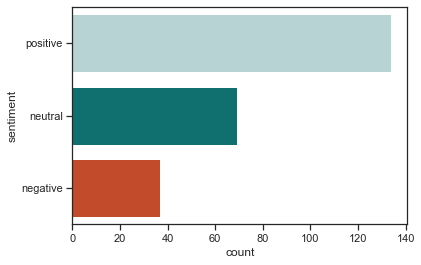

In [174]:
# Number of submissions by sentiment
sns.countplot(y='sentiment', 
             data=df_terraluna_phase1, 
             order=['positive', 'neutral', 'negative'], 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

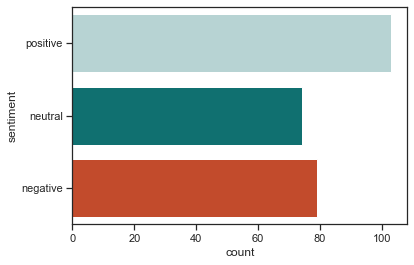

In [175]:
# Number of submissions by sentiment
sns.countplot(y='sentiment', 
             data=df_terraluna_phase2, 
             order=['positive', 'neutral', 'negative'], 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

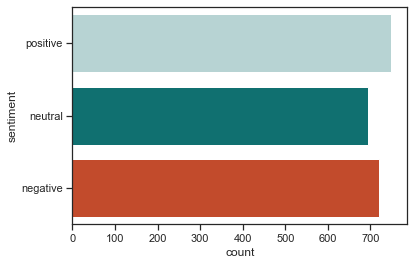

In [176]:
# Number of submissions by sentiment
sns.countplot(y='sentiment', 
             data=df_terraluna_phase3, 
             order=['positive', 'neutral', 'negative'], 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

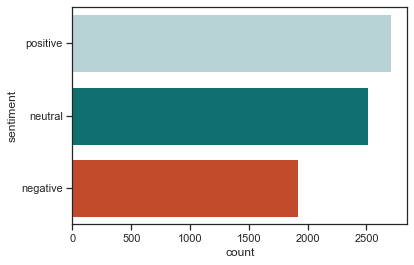

In [177]:
# Number of submissions by sentiment
sns.countplot(y='sentiment', 
             data=df_terraluna_phase4, 
             order=['positive', 'neutral', 'negative'], 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

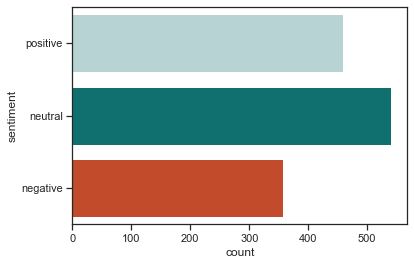

In [178]:
# Number of submissions by sentiment
sns.countplot(y='sentiment', 
             data=df_terraluna_phase5, 
             order=['positive', 'neutral', 'negative'], 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

### GloVe

In [179]:
from gensim.models import KeyedVectors
import numpy as np

In [180]:
glove_file = 'glove.6B/glove.6B.50d.txt'  # Path to the downloaded GloVe text file
word_vectors = KeyedVectors.load_word2vec_format(glove_file, binary=False)

In [54]:
word_dictionary = {
    "Fruits": ["apple", "banana", "orange"],
    "Animals": ["cat", "dog", "lion"],
    "Colors": ["red", "blue", "green"],
    'Vehicles': ['plane']
}

In [55]:
def get_key_by_word(dictionary, word):
    for key, word_list in dictionary.items():
        if word in word_list:
            return key
    return None  # Return None if the word is not found in any list

In [56]:
def categorize_word(word):
    if word in word_vectors.index_to_key:
        word_vector = word_vectors[word]
        category_vectors = [word_vectors[category_word] for category_word_list in word_dictionary.values() for category_word in category_word_list]
        similarities = np.dot(category_vectors, word_vector)
        category_index = np.argmax(similarities)
        categories = []

        for category_word_list in word_dictionary.values():
            for category_word in category_word_list:
                categories.append(get_key_by_word(word_dictionary, category_word))
                
        return categories[category_index]
    else:
        # Out of vocabulary word, assign a random vector
        word_vector = np.random.uniform(-1, 1, size=word_vectors.vector_size)
        category_vectors = [word_vectors[category_word] for category_word_list in word_dictionary.values() for category_word in category_word_list]
        similarities = np.dot(category_vectors, word_vector)
        category_index = np.argmax(similarities)
        categories = []

        for category_word_list in word_dictionary.values():
            for category_word in category_word_list:
                categories.append(get_key_by_word(word_dictionary, category_word))

        return categories[category_index]

In [57]:
words_to_categorize = ["apple", "dog", "blue", "car"]

for word in words_to_categorize:
    category = categorize_word(word)
    print(f"The word '{word}' belongs to the category '{category}'.")


The word 'apple' belongs to the category 'Fruits'.
The word 'dog' belongs to the category 'Animals'.
The word 'blue' belongs to the category 'Colors'.
The word 'car' belongs to the category 'Vehicles'.


### Get Corpus - Phase 1

In [58]:
# Sample text corpus
corpus = df_terraluna_phase1.text_string_lem

# Preprocessing the corpus
tokenized_corpus = [doc.lower().split() for doc in corpus]


# Replace TerraLuna related words in corpus with a single word/category
original_list = tokenized_corpus
replacement_value = "terraluna"
to_be_replaced = ['luna', 'terra', 'ust', 'classic', 'lunc', 'anchor']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_replaced:
            new_nest_list.append(replacement_value)
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

# Delete words
original_list = tokenized_corpus

to_be_deleted = ['amp', 'com', 'x200b', 'www', '000', '100', 'd0aqga2jlmypxcg', 'swjsh8']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_deleted:
            pass
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

### Network Analysis - Phase 1

In [181]:
# import networkx as nx
# from itertools import combinations
# from collections import Counter

# # Create a graph
# G = nx.Graph()

# # Add nodes to the graph
# for doc in tokenized_corpus:
#     G.add_nodes_from(doc)

# # Add edges to the graph
# for doc in tokenized_corpus:
#     edges = combinations(doc, 2)  # Generate all possible edges in a document
#     G.add_edges_from(edges)

# # Calculate centrality measures
# degree_centrality = nx.degree_centrality(G)
# betweenness_centrality = nx.betweenness_centrality(G)
# closeness_centrality = nx.closeness_centrality(G)


# # Print the most central nodes based on degree centrality
# print("Top 20 nodes based on degree centrality:")
# sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
# for node, centrality in sorted_degree_centrality[:20]:
#     print(f"{node}: {centrality}")

# # Print the most central nodes based on betweenness centrality
# print("Top 20 nodes based on betweenness centrality:")
# sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
# for node, centrality in sorted_betweenness_centrality[:20]:
#     print(f"{node}: {centrality}")

# # Print the most central nodes based on closeness centrality
# print("Top 20 nodes based on closeness centrality:")
# sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
# for node, centrality in sorted_closeness_centrality[:20]:
#     print(f"{node}: {centrality}")

# # Generate a word co-occurrence network based on document frequency
# document_frequency = Counter()
# for doc in tokenized_corpus:
#     document_frequency.update(set(doc))

# cooccurrence_network = nx.Graph()
# for doc in tokenized_corpus:
#     edges = combinations(set(doc), 2)
#     for edge in edges:
#         cooccurrence_network.add_edge(*edge, weight=document_frequency[edge[0]] + document_frequency[edge[1]])

# # Print the edges with the highest weights in the co-occurrence network
# print("Top 20 edges based on weight in the co-occurrence network:")
# sorted_edges = sorted(cooccurrence_network.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
# for edge in sorted_edges[:20]:
#     print(edge)

In [182]:
# # Filter graph for easier understanding

# threshold = 60
# filtered_graph = nx.Graph()
# filtered_graph.add_nodes_from(cooccurrence_network.nodes())
# filtered_graph.add_weighted_edges_from((u, v, w) for u, v, w in cooccurrence_network.edges(data='weight') if w > threshold)

# filtered_graph.remove_node('terraluna')

# # Print the edges with the highest weights in the co-occurrence network
# print("Top 20 edges based on weight in the co-occurrence network:")
# sorted_edges = sorted(filtered_graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
# for edge in sorted_edges[:20]:
#     print(edge)

In [183]:
# # Get nodes without edges
# isolated_nodes = list(nx.isolates(filtered_graph))

# # Remove isolated nodes from the graph
# filtered_graph.remove_nodes_from(isolated_nodes)

# # Get weights for all edges
# weights = [data['weight']/5 for _, _, data in filtered_graph.edges(data=True)]

# # Draw the graph with edge thickness according to weights
# nx.draw(filtered_graph, with_labels=True, width=weights)

# plt.savefig("plot.png", dpi=1000)
# plt.show()

### LDA - Phase 1

In [62]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel

# Create a dictionary from the tokenized corpus
dictionary = corpora.Dictionary(tokenized_corpus)

# Convert the tokenized corpus to a bag-of-words representation
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_corpus]

In [63]:
# Hyperparameter tuning

# Train the LDA model, calculate the coherence score

# num_topics = 10

# Loop over num_topics, define model
for num_topics in range(1,11):
    
    lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # print the coherence score
    print("Coherence Score for", num_topics, "number of topics:", coherence_score)

Coherence Score for 1 number of topics: 0.2748739799532675
Coherence Score for 2 number of topics: 0.294685410970196
Coherence Score for 3 number of topics: 0.3027282014697646
Coherence Score for 4 number of topics: 0.282257123712092
Coherence Score for 5 number of topics: 0.34995985802892726
Coherence Score for 6 number of topics: 0.310151056200299
Coherence Score for 7 number of topics: 0.29725021489787384
Coherence Score for 8 number of topics: 0.3449368802812398
Coherence Score for 9 number of topics: 0.3298016514496841
Coherence Score for 10 number of topics: 0.3400678618444573


In [64]:
# Use no of topics as per trained 
num_topics_final = 3
lda_model = LdaModel(bow_corpus, num_topics=num_topics_final, id2word=dictionary, passes=10)

# Step 6: Print the topics and their corresponding words
for topic_id in range(num_topics_final):
    print(f"Topic {topic_id + 1}:")
    words = lda_model.show_topic(topic_id)
    for word, prob in words:
        print(f"{word}: {prob}")
    print()

Topic 1:
changed: 0.021163035184144974
terraluna: 0.020634161308407784
one: 0.009504405781626701
crypto: 0.008069989271461964
like: 0.007351184729486704
cro: 0.005766681395471096
market: 0.005557423457503319
wallet: 0.005466685630381107
see: 0.005301336757838726
right: 0.004994119517505169

Topic 2:
terraluna: 0.015208329074084759
png: 0.009286385960876942
crypto: 0.008033079095184803
var: 0.00638358062133193
like: 0.005566409323364496
twitter: 0.005365132819861174
coin: 0.005166950169950724
price: 0.00503919692710042
exchange: 0.005034280940890312
format: 0.004854433238506317

Topic 3:
terraluna: 0.09226294606924057
twitter: 0.014802517369389534
status: 0.014184236526489258
alice: 0.013690280728042126
wallet: 0.011487682349979877
code: 0.008594224229454994
protocol: 0.008238120004534721
would: 0.007032238878309727
anyone: 0.007015354465693235
station: 0.006021874025464058



### Get Corpus - Phase 2

In [65]:
# Sample text corpus
corpus = df_terraluna_phase2.text_string_lem

# Preprocessing the corpus
tokenized_corpus = [doc.lower().split() for doc in corpus]


# Replace TerraLuna related words in corpus with a single word/category
original_list = tokenized_corpus
replacement_value = "terraluna"
to_be_replaced = ['luna', 'terra', 'ust', 'classic', 'lunc', 'anchor']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_replaced:
            new_nest_list.append(replacement_value)
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

# Delete words
original_list = tokenized_corpus

to_be_deleted = ['amp', 'com', 'x200b', 'www', '000', '100', 'd0aqga2jlmypxcg', 'swjsh8']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_deleted:
            pass
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

### Network Analysis - Phase 2

In [66]:
import networkx as nx
from itertools import combinations
from collections import Counter

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for doc in tokenized_corpus:
    G.add_nodes_from(doc)

# Add edges to the graph
for doc in tokenized_corpus:
    edges = combinations(doc, 2)  # Generate all possible edges in a document
    G.add_edges_from(edges)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


# Print the most central nodes based on degree centrality
print("Top 20 nodes based on degree centrality:")
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_degree_centrality[:20]:
    print(f"{node}: {centrality}")

# Print the most central nodes based on betweenness centrality
print("Top 20 nodes based on betweenness centrality:")
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_betweenness_centrality[:20]:
    print(f"{node}: {centrality}")

# Print the most central nodes based on closeness centrality
print("Top 20 nodes based on closeness centrality:")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_closeness_centrality[:20]:
    print(f"{node}: {centrality}")

# Generate a word co-occurrence network based on document frequency
document_frequency = Counter()
for doc in tokenized_corpus:
    document_frequency.update(set(doc))

cooccurrence_network = nx.Graph()
for doc in tokenized_corpus:
    edges = combinations(set(doc), 2)
    for edge in edges:
        cooccurrence_network.add_edge(*edge, weight=document_frequency[edge[0]] + document_frequency[edge[1]])

# Print the edges with the highest weights in the co-occurrence network
print("Top 20 edges based on weight in the co-occurrence network:")
sorted_edges = sorted(cooccurrence_network.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for edge in sorted_edges[:20]:
    print(edge)

Top 20 nodes based on degree centrality:
terraluna: 0.9734141791044776
like: 0.6506529850746269
time: 0.6403917910447761
get: 0.6343283582089552
btc: 0.6072761194029851
market: 0.583955223880597
price: 0.5830223880597015
going: 0.570429104477612
crypto: 0.5611007462686567
lot: 0.5279850746268656
people: 0.527518656716418
coins: 0.5261194029850746
first: 0.5237873134328358
much: 0.5205223880597015
last: 0.5130597014925373
money: 0.511660447761194
buy: 0.5074626865671642
bad: 0.5023320895522388
also: 0.4916044776119403
take: 0.4888059701492537
Top 20 nodes based on betweenness centrality:
terraluna: 0.147700023385455
like: 0.01722165645731466
btc: 0.016998580710104728
market: 0.01650585319702287
get: 0.015543022309326276
time: 0.013862479377196438
price: 0.01357927308753504
crypto: 0.01112107698728247
people: 0.010235224102214
going: 0.010018198231436985
would: 0.009727421703597264
much: 0.008537231311472262
money: 0.008111552858890172
see: 0.008047521693567842
one: 0.007604937175454636


In [67]:
# Filter graph for easier understanding

threshold = 60
filtered_graph = nx.Graph()
filtered_graph.add_nodes_from(cooccurrence_network.nodes())
filtered_graph.add_weighted_edges_from((u, v, w) for u, v, w in cooccurrence_network.edges(data='weight') if w > threshold)

filtered_graph.remove_node('terraluna')

# Print the edges with the highest weights in the co-occurrence network
print("Top 20 edges based on weight in the co-occurrence network:")
sorted_edges = sorted(filtered_graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for edge in sorted_edges[:20]:
    print(edge)

Top 20 edges based on weight in the co-occurrence network:
('price', 'market', {'weight': 79})
('price', 'btc', {'weight': 79})
('market', 'btc', {'weight': 78})
('price', 'peg', {'weight': 76})
('peg', 'market', {'weight': 75})
('peg', 'btc', {'weight': 75})
('price', 'crypto', {'weight': 71})
('crypto', 'market', {'weight': 70})
('crypto', 'btc', {'weight': 70})
('price', 'stablecoin', {'weight': 69})
('price', 'get', {'weight': 69})
('bitcoin', 'price', {'weight': 68})
('like', 'price', {'weight': 68})
('price', 'would', {'weight': 68})
('stablecoin', 'market', {'weight': 68})
('stablecoin', 'btc', {'weight': 68})
('get', 'market', {'weight': 68})
('get', 'btc', {'weight': 68})
('bitcoin', 'btc', {'weight': 67})
('bitcoin', 'market', {'weight': 67})


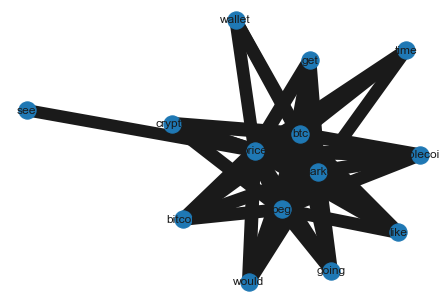

In [68]:
# Get nodes without edges
isolated_nodes = list(nx.isolates(filtered_graph))

# Remove isolated nodes from the graph
filtered_graph.remove_nodes_from(isolated_nodes)

# Get weights for all edges
weights = [data['weight']/5 for _, _, data in filtered_graph.edges(data=True)]

# Draw the graph with edge thickness according to weights
nx.draw(filtered_graph, with_labels=True, width=weights)

plt.savefig("plot.png", dpi=1000)
plt.show()

### LDA - Phase 2

In [69]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel

# Create a dictionary from the tokenized corpus
dictionary = corpora.Dictionary(tokenized_corpus)

# Convert the tokenized corpus to a bag-of-words representation
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_corpus]

# Hyperparameter tuning
# Train the LDA model, calculate the coherence score

# num_topics = 10

# Loop over num_topics, define model
for num_topics in range(1,11):
    
    lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # print the coherence score
    print("Coherence Score for", num_topics, "number of topics:", coherence_score)

Coherence Score for 1 number of topics: 0.3210443269952591
Coherence Score for 2 number of topics: 0.3217284024501704
Coherence Score for 3 number of topics: 0.27419821563095553
Coherence Score for 4 number of topics: 0.32534719326908146
Coherence Score for 5 number of topics: 0.34139996370871595
Coherence Score for 6 number of topics: 0.364230019081385
Coherence Score for 7 number of topics: 0.38376801512115877
Coherence Score for 8 number of topics: 0.3533052843896713
Coherence Score for 9 number of topics: 0.38639886297269926
Coherence Score for 10 number of topics: 0.33817099565080694


In [70]:
# Use no of topics as per trained 
num_topics_final = 8
lda_model = LdaModel(bow_corpus, num_topics=num_topics_final, id2word=dictionary, passes=10)

# Step 6: Print the topics and their corresponding words
for topic_id in range(num_topics_final):
    print(f"Topic {topic_id + 1}:")
    words = lda_model.show_topic(topic_id)
    for word, prob in words:
        print(f"{word}: {prob}")
    print()

Topic 1:
2020: 0.01999005861580372
week: 0.01511344313621521
terraluna: 0.011251401156187057
update: 0.008825904689729214
last: 0.008422882296144962
alice: 0.00825223233550787
weeks: 0.00784215796738863
see: 0.007474700920283794
experiment: 0.007309225387871265
going: 0.006865264847874641

Topic 2:
terraluna: 0.027461465448141098
iron: 0.013065082021057606
suicide: 0.009407556615769863
bridge: 0.009308251552283764
tried: 0.00915452465415001
metamask: 0.007510831113904715
going: 0.006749206688255072
stablecoin: 0.006560432258993387
message: 0.005740642081946135
international: 0.005736680701375008

Topic 3:
changed: 0.06937766075134277
terraluna: 0.03928925469517708
price: 0.01789257302880287
btc: 0.009671111591160297
usdc: 0.007540897931903601
ltc: 0.006715832278132439
minutes: 0.0066759586334228516
order: 0.006565890274941921
wallet: 0.00592444185167551
oracle: 0.005883531179279089

Topic 4:
terraluna: 0.029920684173703194
crypto: 0.013270650990307331
twitter: 0.01196267455816269
statu

### Get Corpus - Phase 3

In [94]:
# Sample text corpus
corpus = df_terraluna_phase3.text_string_lem

# Preprocessing the corpus
tokenized_corpus = [doc.lower().split() for doc in corpus]


# Replace TerraLuna related words in corpus with a single word/category
original_list = tokenized_corpus
replacement_value = "terraluna"
to_be_replaced = ['luna', 'terra', 'ust', 'classic', 'lunc', 'anchor']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_replaced:
            new_nest_list.append(replacement_value)
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

# Delete words
original_list = tokenized_corpus

to_be_deleted = ['amp', 'com', 'x200b', 'www', '000', '100', 'd0aqga2jlmypxcg', 'swjsh8']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_deleted:
            pass
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

### Network Analysis - Phase 3

In [72]:
import networkx as nx
from itertools import combinations
from collections import Counter

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for doc in tokenized_corpus:
    G.add_nodes_from(doc)

# Add edges to the graph
for doc in tokenized_corpus:
    edges = combinations(doc, 2)  # Generate all possible edges in a document
    G.add_edges_from(edges)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


# Print the most central nodes based on degree centrality
print("Top 20 nodes based on degree centrality:")
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_degree_centrality[:20]:
    print(f"{node}: {centrality}")

# Print the most central nodes based on betweenness centrality
print("Top 20 nodes based on betweenness centrality:")
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_betweenness_centrality[:20]:
    print(f"{node}: {centrality}")

# Print the most central nodes based on closeness centrality
print("Top 20 nodes based on closeness centrality:")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_closeness_centrality[:20]:
    print(f"{node}: {centrality}")

# Generate a word co-occurrence network based on document frequency
document_frequency = Counter()
for doc in tokenized_corpus:
    document_frequency.update(set(doc))

cooccurrence_network = nx.Graph()
for doc in tokenized_corpus:
    edges = combinations(set(doc), 2)
    for edge in edges:
        cooccurrence_network.add_edge(*edge, weight=document_frequency[edge[0]] + document_frequency[edge[1]])

# Print the edges with the highest weights in the co-occurrence network
print("Top 20 edges based on weight in the co-occurrence network:")
sorted_edges = sorted(cooccurrence_network.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for edge in sorted_edges[:20]:
    print(edge)

Top 20 nodes based on degree centrality:
terraluna: 0.9877022653721683
crypto: 0.840992448759439
like: 0.8103559870550162
market: 0.7771305285868393
people: 0.770873786407767
money: 0.7531823085221143
time: 0.7458468176914779
even: 0.7449838187702266
would: 0.7408845738942826
back: 0.729881337648328
one: 0.7154261057173679
get: 0.7152103559870551
know: 0.7104638619201726
price: 0.6964401294498382
think: 0.6914778856526429
could: 0.6893203883495146
going: 0.6841423948220064
see: 0.6714131607335491
still: 0.6629989212513484
much: 0.6563106796116505
Top 20 nodes based on betweenness centrality:
terraluna: 0.053201113760852514
crypto: 0.016200692629973538
like: 0.01323312841952136
market: 0.011141625685627404
people: 0.010512462403737802
money: 0.010170779849893188
would: 0.00985396346210565
time: 0.009247720181476305
even: 0.008767317540215912
get: 0.008747461579274037
back: 0.00834220308808378
one: 0.00817019505080984
know: 0.007854869242005453
could: 0.007799460373677963
price: 0.007716

In [73]:
# Filter graph for easier understanding

threshold = 60
filtered_graph = nx.Graph()
filtered_graph.add_nodes_from(cooccurrence_network.nodes())
filtered_graph.add_weighted_edges_from((u, v, w) for u, v, w in cooccurrence_network.edges(data='weight') if w > threshold)

filtered_graph.remove_node('terraluna')

# Print the edges with the highest weights in the co-occurrence network
print("Top 20 edges based on weight in the co-occurrence network:")
sorted_edges = sorted(filtered_graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for edge in sorted_edges[:20]:
    print(edge)

Top 20 edges based on weight in the co-occurrence network:
('like', 'crypto', {'weight': 732})
('people', 'crypto', {'weight': 704})
('crypto', 'market', {'weight': 683})
('money', 'crypto', {'weight': 673})
('crypto', 'back', {'weight': 657})
('would', 'crypto', {'weight': 654})
('time', 'crypto', {'weight': 652})
('people', 'like', {'weight': 652})
('buy', 'crypto', {'weight': 646})
('crypto', 'get', {'weight': 643})
('even', 'crypto', {'weight': 634})
('like', 'market', {'weight': 631})
('price', 'crypto', {'weight': 629})
('know', 'crypto', {'weight': 622})
('money', 'like', {'weight': 621})
('one', 'crypto', {'weight': 619})
('going', 'crypto', {'weight': 619})
('think', 'crypto', {'weight': 619})
('crypto', 'lost', {'weight': 607})
('like', 'back', {'weight': 605})


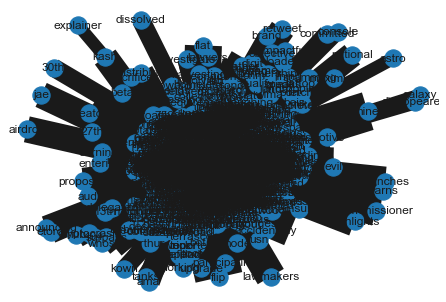

In [74]:
# Get nodes without edges
isolated_nodes = list(nx.isolates(filtered_graph))

# Remove isolated nodes from the graph
filtered_graph.remove_nodes_from(isolated_nodes)

# Get weights for all edges
weights = [data['weight']/5 for _, _, data in filtered_graph.edges(data=True)]

# Draw the graph with edge thickness according to weights
nx.draw(filtered_graph, with_labels=True, width=weights)

plt.savefig("plot.png", dpi=1000)
plt.show()

### LDA - Phase 3

In [75]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel

# Create a dictionary from the tokenized corpus
dictionary = corpora.Dictionary(tokenized_corpus)

# Convert the tokenized corpus to a bag-of-words representation
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_corpus]

# Hyperparameter tuning
# Train the LDA model, calculate the coherence score

# num_topics = 10

# Loop over num_topics, define model
for num_topics in range(1,11):
    
    lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # print the coherence score
    print("Coherence Score for", num_topics, "number of topics:", coherence_score)

Coherence Score for 1 number of topics: 0.38551086381317823
Coherence Score for 2 number of topics: 0.36242681056284654
Coherence Score for 3 number of topics: 0.3658247725795834
Coherence Score for 4 number of topics: 0.3664968252615851
Coherence Score for 5 number of topics: 0.32499339723882315
Coherence Score for 6 number of topics: 0.33881218841853716
Coherence Score for 7 number of topics: 0.3558787563182375
Coherence Score for 8 number of topics: 0.42801235180186215
Coherence Score for 9 number of topics: 0.3953649698477739
Coherence Score for 10 number of topics: 0.3619718734975204


In [95]:
# Use no of topics as per trained 
num_topics_final = 8
lda_model = LdaModel(bow_corpus, num_topics=num_topics_final, id2word=dictionary, passes=10)

# Step 6: Print the topics and their corresponding words
for topic_id in range(num_topics_final):
    print(f"Topic {topic_id + 1}:")
    words = lda_model.show_topic(topic_id)
    for word, prob in words:
        print(f"{word}: {prob}")
    print()

Topic 1:
auto: 0.020871810615062714
redd: 0.020453477278351784
preview: 0.02028830163180828
width: 0.020218100398778915
webp: 0.02021803893148899
format: 0.02015852928161621
jpg: 0.018378501757979393
pjpg: 0.017926344648003578
scammers: 0.01599648967385292
bybit: 0.013167948462069035

Topic 2:
people: 0.02574435994029045
money: 0.01966298371553421
like: 0.018200498074293137
know: 0.0116208391264081
make: 0.010948418639600277
even: 0.010149909183382988
think: 0.009961618110537529
lost: 0.009346731007099152
get: 0.00913907028734684
going: 0.008070871233940125

Topic 3:
terraluna: 0.10201921314001083
burn: 0.06061762571334839
proposal: 0.02437969297170639
community: 0.022185463458299637
twitter: 0.019587650895118713
kwon: 0.01695350930094719
money: 0.015187106095254421
fork: 0.015160112641751766
vote: 0.014565803110599518
plan: 0.014181578531861305

Topic 4:
terraluna: 0.1403687447309494
kwon: 0.08267746865749359
binance: 0.02333824150264263
crash: 0.01947180926799774
crypto: 0.0170320477

### Get Corpus - Phase 4

In [90]:
# Sample text corpus
corpus = df_terraluna_phase4.text_string_lem

# Preprocessing the corpus
tokenized_corpus = [doc.lower().split() for doc in corpus]


# Replace TerraLuna related words in corpus with a single word/category
original_list = tokenized_corpus
replacement_value = "terraluna"
to_be_replaced = ['luna', 'terra', 'ust', 'classic', 'lunc', 'anchor']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_replaced:
            new_nest_list.append(replacement_value)
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

# Delete words
original_list = tokenized_corpus

to_be_deleted = ['amp', 'com', 'x200b', 'www', '000', '100', 'd0aqga2jlmypxcg', 'swjsh8']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_deleted:
            pass
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

### Network Analysis - Phase 4

In [78]:
import networkx as nx
from itertools import combinations
from collections import Counter

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for doc in tokenized_corpus:
    G.add_nodes_from(doc)

# Add edges to the graph
for doc in tokenized_corpus:
    edges = combinations(doc, 2)  # Generate all possible edges in a document
    G.add_edges_from(edges)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


# Print the most central nodes based on degree centrality
print("Top 20 nodes based on degree centrality:")
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_degree_centrality[:20]:
    print(f"{node}: {centrality}")

# Print the most central nodes based on betweenness centrality
print("Top 20 nodes based on betweenness centrality:")
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_betweenness_centrality[:20]:
    print(f"{node}: {centrality}")

# Print the most central nodes based on closeness centrality
print("Top 20 nodes based on closeness centrality:")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_closeness_centrality[:20]:
    print(f"{node}: {centrality}")

# Generate a word co-occurrence network based on document frequency
document_frequency = Counter()
for doc in tokenized_corpus:
    document_frequency.update(set(doc))

cooccurrence_network = nx.Graph()
for doc in tokenized_corpus:
    edges = combinations(set(doc), 2)
    for edge in edges:
        cooccurrence_network.add_edge(*edge, weight=document_frequency[edge[0]] + document_frequency[edge[1]])

# Print the edges with the highest weights in the co-occurrence network
print("Top 20 edges based on weight in the co-occurrence network:")
sorted_edges = sorted(cooccurrence_network.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for edge in sorted_edges[:20]:
    print(edge)

Top 20 nodes based on degree centrality:
terraluna: 0.9911018553578189
like: 0.8557364634608102
crypto: 0.8468383188186293
would: 0.8453237410071942
people: 0.8307459295721317
one: 0.8171147292692161
money: 0.8137069291934873
get: 0.8118137069291934
time: 0.7951533510034078
even: 0.7822794396062097
market: 0.7801968951154865
new: 0.7733812949640287
know: 0.771488072699735
also: 0.7663763725861416
still: 0.7610753502461188
back: 0.7601287391139719
see: 0.7487694055282089
think: 0.7444149943203332
much: 0.7419538053767512
going: 0.7385460053010223
Top 20 nodes based on betweenness centrality:
terraluna: 0.030068282224268657
crypto: 0.010235738538580279
like: 0.009129113428395244
would: 0.008528058218155821
people: 0.007638700642909391
get: 0.007380888700922142
money: 0.007127112813793424
new: 0.006922648145556811
one: 0.00686218345639039
even: 0.006514385512994331
time: 0.00617093318367034
know: 0.006055923302218227
market: 0.005797735810095785
back: 0.005666809413198712
still: 0.0051701

In [79]:
# Filter graph for easier understanding

threshold = 60
filtered_graph = nx.Graph()
filtered_graph.add_nodes_from(cooccurrence_network.nodes())
filtered_graph.add_weighted_edges_from((u, v, w) for u, v, w in cooccurrence_network.edges(data='weight') if w > threshold)

filtered_graph.remove_node('terraluna')

# Print the edges with the highest weights in the co-occurrence network
print("Top 20 edges based on weight in the co-occurrence network:")
sorted_edges = sorted(filtered_graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for edge in sorted_edges[:20]:
    print(edge)

Top 20 edges based on weight in the co-occurrence network:
('get', 'new', {'weight': 1662})
('crypto', 'new', {'weight': 1578})
('crypto', 'get', {'weight': 1558})
('like', 'new', {'weight': 1554})
('like', 'get', {'weight': 1534})
('new', 'kwon', {'weight': 1502})
('people', 'new', {'weight': 1482})
('get', 'kwon', {'weight': 1482})
('people', 'get', {'weight': 1462})
('crypto', 'like', {'weight': 1450})
('new', 'money', {'weight': 1447})
('get', 'money', {'weight': 1427})
('new', 'would', {'weight': 1416})
('new', 'burn', {'weight': 1411})
('crypto', 'kwon', {'weight': 1398})
('know', 'new', {'weight': 1398})
('get', 'would', {'weight': 1396})
('buy', 'new', {'weight': 1395})
('get', 'burn', {'weight': 1391})
('new', 'wallet', {'weight': 1386})


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 119811 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 119848 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 119856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 119847 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 119845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 119834 missing 

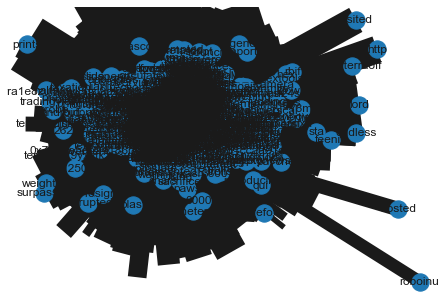

In [80]:
# Get nodes without edges
isolated_nodes = list(nx.isolates(filtered_graph))

# Remove isolated nodes from the graph
filtered_graph.remove_nodes_from(isolated_nodes)

# Get weights for all edges
weights = [data['weight']/5 for _, _, data in filtered_graph.edges(data=True)]

# Draw the graph with edge thickness according to weights
nx.draw(filtered_graph, with_labels=True, width=weights)

plt.savefig("plot.png", dpi=1000)
plt.show()

### LDA - Phase 4

In [91]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel

# Create a dictionary from the tokenized corpus
dictionary = corpora.Dictionary(tokenized_corpus)

# Convert the tokenized corpus to a bag-of-words representation
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_corpus]

# Hyperparameter tuning
# Train the LDA model, calculate the coherence score

# num_topics = 10

# Loop over num_topics, define model
for num_topics in range(1,11):
    
    lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # print the coherence score
    print("Coherence Score for", num_topics, "number of topics:", coherence_score)

Coherence Score for 1 number of topics: 0.3901426216739739
Coherence Score for 2 number of topics: 0.4252691996264923
Coherence Score for 3 number of topics: 0.43842480065184847
Coherence Score for 4 number of topics: 0.4500773938138998
Coherence Score for 5 number of topics: 0.3855975181894668
Coherence Score for 6 number of topics: 0.4167634529314088
Coherence Score for 7 number of topics: 0.4157505804543597
Coherence Score for 8 number of topics: 0.4401809207601105
Coherence Score for 9 number of topics: 0.43020593639337057
Coherence Score for 10 number of topics: 0.39286280845093124


In [92]:
# Use no of topics as per trained 
num_topics_final = 4
lda_model = LdaModel(bow_corpus, num_topics=num_topics_final, id2word=dictionary, passes=10)

# Step 6: Print the topics and their corresponding words
for topic_id in range(num_topics_final):
    print(f"Topic {topic_id + 1}:")
    words = lda_model.show_topic(topic_id)
    for word, prob in words:
        print(f"{word}: {prob}")
    print()

Topic 1:
terraluna: 0.024123717099428177
crypto: 0.022443832829594612
kwon: 0.013162759132683277
btc: 0.007480167783796787
bitcoin: 0.0071166702546179295
crash: 0.007071176078170538
people: 0.006480605341494083
like: 0.005876429378986359
one: 0.005366893485188484
png: 0.005017727147787809

Topic 2:
terraluna: 0.03231359273195267
market: 0.012005606666207314
price: 0.008013230748474598
people: 0.007429135497659445
would: 0.006811691448092461
could: 0.00657305121421814
like: 0.006477480288594961
crypto: 0.005946339573711157
money: 0.005816920194774866
usdt: 0.0054791513830423355

Topic 3:
terraluna: 0.20403911173343658
airdrop: 0.024848168715834618
wallet: 0.0223217885941267
new: 0.015748677775263786
station: 0.015265666879713535
get: 0.014108964242041111
binance: 0.01322544738650322
anyone: 0.00881529226899147
holders: 0.007439501583576202
tokens: 0.007102877367287874

Topic 4:
terraluna: 0.07372009754180908
burn: 0.017249757423996925
new: 0.010882426984608173
people: 0.0107076894491910

### Get Corpus - Phase 5

In [83]:
# Sample text corpus
corpus = df_terraluna_phase5.text_string_lem

# Preprocessing the corpus
tokenized_corpus = [doc.lower().split() for doc in corpus]


# Replace TerraLuna related words in corpus with a single word/category
original_list = tokenized_corpus
replacement_value = "terraluna"
to_be_replaced = ['luna', 'terra', 'ust', 'classic', 'lunc', 'anchor']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_replaced:
            new_nest_list.append(replacement_value)
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

# Delete words
original_list = tokenized_corpus

to_be_deleted = ['amp', 'com', 'x200b', 'www', '000', '100', 'd0aqga2jlmypxcg', 'swjsh8']

new_list=[]

for nest_list in original_list:
    new_nest_list=[]
    for _ in nest_list:
        if _ in to_be_deleted:
            pass
        else: 
            new_nest_list.append(_)
    new_list.append(new_nest_list)
    
tokenized_corpus = new_list

### Network Analysis - Phase 5

In [126]:
import networkx as nx
from itertools import combinations
from collections import Counter

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for doc in tokenized_corpus:
    G.add_nodes_from(doc)

# Add edges to the graph
for doc in tokenized_corpus:
    edges = combinations(doc, 2)  # Generate all possible edges in a document
    G.add_edges_from(edges)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


# Print the most central nodes based on degree centrality
print("Top 20 nodes based on degree centrality:")
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_degree_centrality[:20]:
    print(f"{node}: {centrality}")

# Print the most central nodes based on betweenness centrality
print("Top 20 nodes based on betweenness centrality:")
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_betweenness_centrality[:20]:
    print(f"{node}: {centrality}")

# Print the most central nodes based on closeness centrality
print("Top 20 nodes based on closeness centrality:")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
for node, centrality in sorted_closeness_centrality[:20]:
    print(f"{node}: {centrality}")

# Generate a word co-occurrence network based on document frequency
document_frequency = Counter()
for doc in tokenized_corpus:
    document_frequency.update(set(doc))

cooccurrence_network = nx.Graph()
for doc in tokenized_corpus:
    edges = combinations(set(doc), 2)
    for edge in edges:
        cooccurrence_network.add_edge(*edge, weight=document_frequency[edge[0]] + document_frequency[edge[1]])

# Print the edges with the highest weights in the co-occurrence network
print("Top 20 edges based on weight in the co-occurrence network:")
sorted_edges = sorted(cooccurrence_network.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for edge in sorted_edges[:20]:
    print(edge)

Top 20 nodes based on degree centrality:
terraluna: 0.9877022653721683
crypto: 0.840992448759439
like: 0.8103559870550162
market: 0.7771305285868393
people: 0.770873786407767
money: 0.7531823085221143
time: 0.7458468176914779
even: 0.7449838187702266
would: 0.7408845738942826
back: 0.729881337648328
one: 0.7154261057173679
get: 0.7152103559870551
know: 0.7104638619201726
price: 0.6964401294498382
think: 0.6914778856526429
could: 0.6893203883495146
going: 0.6841423948220064
see: 0.6714131607335491
still: 0.6629989212513484
much: 0.6563106796116505
Top 20 nodes based on betweenness centrality:
terraluna: 0.053201113760852514
crypto: 0.016200692629973538
like: 0.01323312841952136
market: 0.011141625685627404
people: 0.010512462403737802
money: 0.010170779849893188
would: 0.00985396346210565
time: 0.009247720181476305
even: 0.008767317540215912
get: 0.008747461579274037
back: 0.00834220308808378
one: 0.00817019505080984
know: 0.007854869242005453
could: 0.007799460373677963
price: 0.007716

In [127]:
# Filter graph for easier understanding

threshold = 60
filtered_graph = nx.Graph()
filtered_graph.add_nodes_from(cooccurrence_network.nodes())
filtered_graph.add_weighted_edges_from((u, v, w) for u, v, w in cooccurrence_network.edges(data='weight') if w > threshold)

filtered_graph.remove_node('terraluna')

# Print the edges with the highest weights in the co-occurrence network
print("Top 20 edges based on weight in the co-occurrence network:")
sorted_edges = sorted(filtered_graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
for edge in sorted_edges[:20]:
    print(edge)

Top 20 edges based on weight in the co-occurrence network:
('like', 'crypto', {'weight': 732})
('people', 'crypto', {'weight': 704})
('crypto', 'market', {'weight': 683})
('money', 'crypto', {'weight': 673})
('crypto', 'back', {'weight': 657})
('would', 'crypto', {'weight': 654})
('time', 'crypto', {'weight': 652})
('people', 'like', {'weight': 652})
('buy', 'crypto', {'weight': 646})
('crypto', 'get', {'weight': 643})
('even', 'crypto', {'weight': 634})
('like', 'market', {'weight': 631})
('price', 'crypto', {'weight': 629})
('know', 'crypto', {'weight': 622})
('money', 'like', {'weight': 621})
('one', 'crypto', {'weight': 619})
('going', 'crypto', {'weight': 619})
('think', 'crypto', {'weight': 619})
('crypto', 'lost', {'weight': 607})
('like', 'back', {'weight': 605})


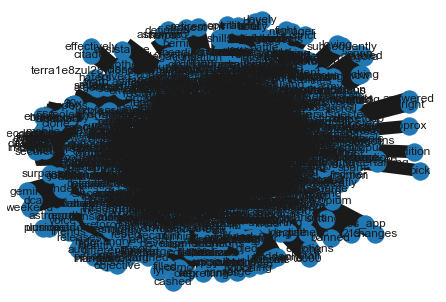

In [86]:
# Get nodes without edges
isolated_nodes = list(nx.isolates(filtered_graph))

# Remove isolated nodes from the graph
filtered_graph.remove_nodes_from(isolated_nodes)

# Get weights for all edges
weights = [data['weight']/5 for _, _, data in filtered_graph.edges(data=True)]

# Draw the graph with edge thickness according to weights
nx.draw(filtered_graph, with_labels=True, width=weights)

plt.savefig("plot.png", dpi=1000)
plt.show()

### LDA - Phase 5

In [87]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel

# Create a dictionary from the tokenized corpus
dictionary = corpora.Dictionary(tokenized_corpus)

# Convert the tokenized corpus to a bag-of-words representation
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_corpus]

# Hyperparameter tuning
# Train the LDA model, calculate the coherence score

# num_topics = 10

# Loop over num_topics, define model
for num_topics in range(1,11):
    
    lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # print the coherence score
    print("Coherence Score for", num_topics, "number of topics:", coherence_score)

Coherence Score for 1 number of topics: 0.2425074150333018
Coherence Score for 2 number of topics: 0.31615663553550016
Coherence Score for 3 number of topics: 0.2854331213221191
Coherence Score for 4 number of topics: 0.25124208273992554
Coherence Score for 5 number of topics: 0.25637607463941253
Coherence Score for 6 number of topics: 0.32773798756991923
Coherence Score for 7 number of topics: 0.348970304689911
Coherence Score for 8 number of topics: 0.34346410581496406
Coherence Score for 9 number of topics: 0.33392260210962416
Coherence Score for 10 number of topics: 0.3283287337747218


In [89]:
# Use no of topics as per trained 
num_topics_final = 7
lda_model = LdaModel(bow_corpus, num_topics=num_topics_final, id2word=dictionary, passes=10)

# Step 6: Print the topics and their corresponding words
for topic_id in range(num_topics_final):
    print(f"Topic {topic_id + 1}:")
    words = lda_model.show_topic(topic_id)
    for word, prob in words:
        print(f"{word}: {prob}")
    print()

Topic 1:
terraluna: 0.05147203430533409
binance: 0.019894853234291077
wallet: 0.017810797318816185
new: 0.017520489171147346
trading: 0.01149585098028183
lunac: 0.011392401531338692
pump: 0.010243844240903854
investors: 0.006327387411147356
going: 0.005669309291988611
dump: 0.005651300307363272

Topic 2:
terraluna: 0.11107151210308075
airdrop: 0.021143149584531784
wallet: 0.016069868579506874
anyone: 0.014442037791013718
get: 0.010563993826508522
money: 0.009381400421261787
post: 0.008851354941725731
validator: 0.008329776115715504
station: 0.00771345617249608
sure: 0.007426158990710974

Topic 3:
terraluna: 0.07613648474216461
crypto: 0.01980147883296013
poll: 0.016023410484194756
airdrop: 0.01586664654314518
luna2: 0.014562207274138927
got: 0.010471156798303127
binance: 0.009549961425364017
view: 0.008677884936332703
reddit: 0.008563927374780178
get: 0.008014257997274399

Topic 4:
terraluna: 0.09393975138664246
kwon: 0.012147657573223114
burn: 0.011563113890588284
new: 0.0090459929779

### Deep Dive Topics

In [96]:
df_terraluna_phase1.head()

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment,date_conv
304,CryptoCurrency,NaN,Bitcoin And Crypto Now Braced For A $9 Trillio...,2022-05-01,nan bitcoin and crypto now braced for a $9 tri...,"[bitcoin, crypto, braced, 9, trillion, fed, ea...",bitcoin crypto braced trillion fed earthquake ...,bitcoin crypto trillion fed price ethereum bnb...,bitcoin crypto trillion fed price ethereum bnb...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.00,0.00,0.0000,neutral,2022-05-01
305,CryptoCurrency,NaN,"110,000 LUNA Bought by Top Whale as Terra Retu...",2022-04-30,"nan 110,000 luna bought by top whale as terra ...","[110, 000, luna, bought, top, whale, terra, re...",110 000 luna bought top whale terra returns pu...,000 luna bought top whale terra returns purcha...,000 luna bought top whale terra returns purcha...,True,"{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compou...",0.0,0.65,0.35,0.5106,positive,2022-04-30
447,CryptoCurrency,NaN,"Madoff promised 12% per-year, Terra Luna is pr...",2022-05-05,"nan madoff promised 12% per-year, terra luna i...","[madoff, promised, 12, per, year, terra, luna,...",madoff promised per year terra luna promising,madoff promised per year terra luna promising,madoff promised per year terra luna promising,True,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...",0.0,0.49,0.51,0.6369,positive,2022-05-05
510,CryptoCurrency,NaN,"Price analysis 5/4: BTC, ETH, BNB, SOL, XRP, L...",2022-05-04,"nan price analysis 5/4: btc, eth, bnb, sol, xr...","[price, analysis, 5, 4, btc, eth, bnb, sol, xr...",price analysis btc eth bnb sol xrp luna ada do...,price analysis btc eth bnb sol xrp luna ada do...,price analysis btc eth bnb sol xrp luna ada do...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.00,0.00,0.0000,neutral,2022-05-04
2075,CryptoCurrency,NaN,Intro to Terra minting mechanism,2022-04-30,nan intro to terra minting mechanism,"[intro, terra, minting, mechanism]",intro terra minting mechanism,terra minting mechanism,terra minting mechanism,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.00,0.00,0.0000,neutral,2022-04-30


In [104]:
pd.set_option('display.max_colwidth', None)

In [125]:
df_terraluna_phase4[df_terraluna_phase4['text_string_lem'].str.contains('airdrop')].all_text

455                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nan luna 2.0: scammers simulate airdrop to lure victims
462                                                              

### Network Analysis, but Communities

In [184]:
df_terraluna.head()

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment,date_conv
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against Do Kwon through LUNA short position,2022-05-09,nan trader doubles down on $10 million bet against do kwon through luna short position,"[trader, doubles, 10, million, bet, kwon, luna, short, position]",trader doubles million bet kwon luna short position,trader million bet kwon luna short position,trader million bet kwon luna short position,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000,neutral,2022-05-09
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna,buy terraluna,buy terraluna,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000,neutral,2022-05-14
2,CryptoCurrency,"I know people are mostly burnt out on the TerraLuna story by now. But this is something that doesn't quite make sense on it's face. Fro someone who knows the basics on the two protocols, this seems like a weird mystery. Hopefully, with your ELI5, it will help others understand the Crypto market in general more deeply, even though UST isn't really relevant anymore.\n\nSorry for the dummy question. Just can't find answers anywhere on google or in the other forums. I appreciate you taking the time to educate an idiot like myself. Thanks!","Can someone ELI5: Why does Terra UST have any value at all anymore? I'm shocked to see it in the top 50 on CoinMarketCap. Isn't the value derived from the arbitrage using Luna, which is now dead?",2022-05-14,"i know people are mostly burnt out on the terraluna story by now. but this is something that doesn't quite make sense on it's face. fro someone who knows the basics on the two protocols, this seems like a weird mystery. hopefully, with your eli5, it will help others understand the crypto market in general more deeply, even though ust isn't really relevant anymore.\n\nsorry for the dummy question. just can't find answers anywhere on google or in the other forums. i appreciate you taking the time to educate an idiot like myself. thanks! can someone eli5: why does terra ust have any value at all anymore? i'm shocked to see it in the top 50 on coinmarketcap. isn't the value derived from the arbitrage using luna, which is now dead?","[know, people, mostly, burnt, terraluna, story, something, quite, make, sense, face, fro, someone, knows, basics, two, protocols, seems, like, weird, mystery, hopefully, eli5, help, others, understand, crypto, market, general, deeply, even, though, ust, really, relevant, anymore, sorry, dummy, question, find, answers, anywhere, google, forums, appreciate, taking, time, educate, idiot, like, thanks, someone, eli5, terra, ust, value, anymore, shocked, see, top, 50, coinmarketcap, value, derived, arbitrage, using, luna, dead]",know people mostly burnt terraluna story something quite make sense face fro someone knows basics two protocols seems like weird mystery hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value derived arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems like weird hopefully eli5 help others understand crypto market general deeply even though ust really relevant anymore sorry dummy question find answers anywhere google forums appreciate taking time educate idiot like thanks someone eli5 terra ust value anymore shocked see top coinmarketcap value arbitrage using luna dead,know people mostly burnt terraluna story something quite make sense face someone knows basics two protocols seems lik